In [1]:
%%capture
%run ch04_linear_algebra.ipynb

In [2]:
# Derivative (limit of the difference quotients as h approches zero)

from typing import Callable

def difference_quotient(f: Callable[[float], float], 
                        x: float, 
                        h: float) -> float:
    
    return (f(x + h) - f(x)) / h

def square(x: float) -> float:
    return x * x

def derivative_of_square(x: float) -> float:
    return 2 * x

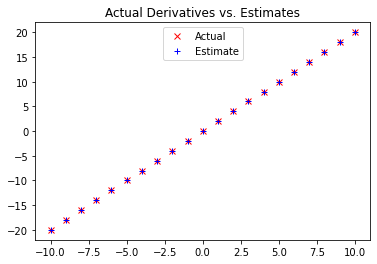

In [3]:
# Estimating derivative (y = x^2)

xs = range(-10, 11)
actuals = [derivative_of_square(x) for x in xs]
estimates = [difference_quotient(square, x, h = 0.001) for x in xs]

# print(actuals)
# print(estimates)

# plot to show they are basically the same
import matplotlib.pyplot as plt
plt.title("Actual Derivatives vs. Estimates")
plt.plot(xs, actuals, 'rx', label='Actual')
plt.plot(xs, estimates, 'b+', label='Estimate')
plt.legend(loc=9)
plt.show()

In [4]:
# Partial derivative

def partial_difference_quotient(f: Callable[[Vector], float], 
                       v: Vector, 
                       i: int, 
                       h: float) -> float:
    
    """Returns the i-th partial difference quotient of f at v"""
    
    w = [v_j + (h if j == i else 0) # add h to just the ith element of v
         for j, v_j in enumerate(v)]
   
    return (f(w) - f(v)) / h

def estimate_gradient(f: Callable[[Vector], float], 
                      v: Vector, 
                      h: float = 0.0001) -> float:
    
    return [partial_difference_quotient(f, v, i, h) 
            for i in range(len(v))]

In [5]:
# Using gradients to find the minimum among the given 3D vectors

import random

def gradient_step(v: Vector, 
                  gradient: Vector, 
                  step_size: float) -> Vector:
    
    """Moves `step_size` in the `gradient` direction from `v`"""
    assert len(v) == len(gradient)
    step = scalar_multiply(step_size, gradient)
    return add(v, step)

def sum_of_squares_gradient(v: Vector) -> Vector:
    return [2 * v_i for v_i in v]

# pick a random starting point
v = [random.uniform(-10, 10) for i in range(3)]

for epoch in range(1000):
    grad = sum_of_squares_gradient(v) # compute gradient at v
    v = gradient_step(v, grad, -0.01) # take a negative gradient step
    print(epoch, grad, v)
    
assert distance(v, [0, 0, 0]) < 0.001 # v should close to zero

0 [0.2837636664038925, 14.351198745534127, 14.395018837824168] [0.13904419653790734, 7.032087385311722, 7.053559230533843]
1 [0.2780883930758147, 14.064174770623444, 14.107118461067685] [0.1362633126071492, 6.891445637605488, 6.9124880459231655]
2 [0.2725266252142984, 13.782891275210975, 13.824976091846331] [0.1335380463550062, 6.753616724853377, 6.774238285004702]
3 [0.2670760927100124, 13.507233449706755, 13.548476570009404] [0.1308672854279061, 6.61854439035631, 6.638753519304608]
4 [0.2617345708558122, 13.23708878071262, 13.277507038609215] [0.12824993971934798, 6.486173502549184, 6.5059784489185155]
5 [0.25649987943869595, 12.972347005098367, 13.011956897837031] [0.12568494092496102, 6.3564500324982, 6.375858879940145]
6 [0.25136988184992204, 12.7129000649964, 12.75171775988029] [0.1231712421064618, 6.229321031848237, 6.2483417023413415]
7 [0.2463424842129236, 12.458642063696473, 12.496683404682683] [0.12070781726433256, 6.1047346112112715, 6.123374868294515]
8 [0.2414156345286651

488 [1.483480099668719e-05, 0.0007502622874588897, 0.0007525531457531078] [7.269052488376723e-06, 0.000367628520854856, 0.00036875104141902284]
489 [1.4538104976753446e-05, 0.000735257041709712, 0.0007375020828380457] [7.123671438609189e-06, 0.0003602759504377589, 0.00036137602059064237]
490 [1.4247342877218377e-05, 0.0007205519008755178, 0.0007227520411812847] [6.981198009837005e-06, 0.0003530704314290037, 0.00035414850017882955]
491 [1.396239601967401e-05, 0.0007061408628580074, 0.0007082970003576591] [6.841574049640265e-06, 0.00034600902280042365, 0.00034706553017525295]
492 [1.368314809928053e-05, 0.0006920180456008473, 0.0006941310603505059] [6.704742568647459e-06, 0.00033908884234441517, 0.0003401242195717479]
493 [1.3409485137294918e-05, 0.0006781776846888303, 0.0006802484391434958] [6.57064771727451e-06, 0.0003323070654975269, 0.0003333217351803129]
494 [1.314129543454902e-05, 0.0006646141309950538, 0.0006666434703606258] [6.4392347629290204e-06, 0.00032566092418757637, 0.00032

821 [1.776498848795596e-08, 8.98454984507786e-07, 9.011983358499055e-07] [8.704844359098421e-09, 4.4024294240881517e-07, 4.415871845664537e-07]
822 [1.7409688718196842e-08, 8.804858848176303e-07, 8.831743691329074e-07] [8.530747471916453e-09, 4.3143808356063886e-07, 4.3275544087512463e-07]
823 [1.7061494943832906e-08, 8.628761671212777e-07, 8.655108817502493e-07] [8.360132522478125e-09, 4.228093218894261e-07, 4.2410033205762215e-07]
824 [1.672026504495625e-08, 8.456186437788522e-07, 8.482006641152443e-07] [8.192929872028562e-09, 4.143531354516376e-07, 4.156183254164697e-07]
825 [1.6385859744057124e-08, 8.287062709032752e-07, 8.312366508329394e-07] [8.02907127458799e-09, 4.060660727426048e-07, 4.073059589081403e-07]
826 [1.605814254917598e-08, 8.121321454852096e-07, 8.146119178162806e-07] [7.86848984909623e-09, 3.979447512877527e-07, 3.991598397299775e-07]
827 [1.573697969819246e-08, 7.958895025755054e-07, 7.98319679459955e-07] [7.711120052114305e-09, 3.899858562619977e-07, 3.9117664293

In [6]:
# Using gradients to fit the model


def linear_gradient(x: float, y: float, theta: Vector) -> Vector:
    slope, intercept = theta # model parameters
    predicted = slope * x + intercept # prediction of the model
    error = (predicted - y)
    
    squared_error = error ** 2 # we will minimize squared error
    grad = [2 * error * x, 2 * error]
    
    return grad

inputs = [(x, 20 * x + 5) for x in range (-50, 50)] # y = 20x + 5

# Start with random values for slope and intercept
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]
learning_rate = 0.001

for epoch in range(5000):
    # Compute the mean of the gradients (gradient of the mean squared error)
    grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs])
    
    # Take a step in that direction
    theta = gradient_step(theta, grad, -learning_rate)
    if epoch % 10 == 0:
        print(epoch, theta)
    
slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [33.19556130442455, -0.25513247062323274]
10 [20.226945924695755, -0.14336980066766014]
20 [20.000981367171278, -0.04132061686037702]
30 [19.997102053168025, 0.05857576116978288]
40 [19.997092204093246, 0.15649040885305365]
50 [19.9971486497803, 0.2524648324261787]
60 [19.997205129015654, 0.3465375165497324]
70 [19.99726050918982, 0.43874614498081876]
80 [19.99731479235257, 0.5291276541027155]
90 [19.997367999897403, 0.6177182483904863]
100 [19.99742015313176, 0.7045534149252227]
110 [19.997471272946765, 0.7896679376094481]
120 [19.997521379819677, 0.8730959111006429]
130 [19.997570493822, 0.9548707544686766]
140 [19.997618634627525, 1.0350252245826161]
150 [19.997665821520204, 1.113591429232271]
160 [19.99771207340187, 1.190600839989737]
170 [19.997757408799828, 1.2660843048160884]
180 [19.997801845874253, 1.340072060418265]
190 [19.997845402425472, 1.4125937443611085]
200 [19.99788809590111, 1.4836784069393985]
210 [19.997929943403058, 1.5533545228146417]
220 [19.99797096169433, 1.

1920 [19.999932445428016, 4.88752159707418]
1930 [19.99993378402577, 4.889750363137894]
1940 [19.99993509609913, 4.891934966073066]
1950 [19.999936382173683, 4.894076280974643]
1960 [19.999937642764596, 4.896175165597514]
1970 [19.99993887837682, 4.89823246070011]
1980 [19.999940089505323, 4.900248990381181]
1990 [19.999941276635244, 4.902225562409913]
2000 [19.999942440242116, 4.904162968549502]
2010 [19.999943580792046, 4.906061984874307]
2020 [19.99994469874192, 4.907923372080728]
2030 [19.999945794539546, 4.9097478757919255]
2040 [19.999946868623883, 4.911536226856493]
2050 [19.99994792142518, 4.913289141641214]
2060 [19.999948953365152, 4.915007322318025]
2070 [19.999949964857176, 4.9166914571452836]
2080 [19.999950956306424, 4.9183422207434715]
2090 [19.999951928110054, 4.919960274365422]
2100 [19.999952880657336, 4.921546266161206]
2110 [19.999953814329835, 4.923100831437768]
2120 [19.999954729501564, 4.924624592913404]
2130 [19.99995562653911, 4.926118160967212]
2140 [19.999956

4120 [19.99999917316173, 4.998623313779273]
4130 [19.999999189545576, 4.9986505928964124]
4140 [19.999999205604777, 4.998677331476268]
4150 [19.999999221345764, 4.998703540229614]
4160 [19.99999923677484, 4.998729229654998]
4170 [19.999999251898195, 4.998754410042932]
4180 [19.999999266721876, 4.998779091480021]
4190 [19.999999281251824, 4.998803283853006]
4200 [19.99999929549386, 4.998826996852718]
4210 [19.99999930945369, 4.99885023997797]
4220 [19.999999323136905, 4.998873022539348]
4230 [19.999999336548985, 4.998895353662956]
4240 [19.999999349695305, 4.998917242294056]
4250 [19.999999362581132, 4.998938697200667]
4260 [19.999999375211623, 4.998959726977057]
4270 [19.999999387591842, 4.998980340047212]
4280 [19.999999399726743, 4.999000544668188]
4290 [19.999999411621193, 4.999020348933432]
4300 [19.999999423279952, 4.999039760776015]
4310 [19.999999434707696, 4.999058787971814]
4320 [19.999999445908994, 4.999077438142626]
4330 [19.99999945688834, 4.999095718759223]
4340 [19.999999

In [7]:
# Minibatch gradient descent

from typing import TypeVar, List, Iterator

T = TypeVar('T') # this allows us to type generic functions

def minibatches(dataset: List[T], batch_size: int, shuffle: bool = True) -> Iterator[List[T]]:
    """Generates `batch_size`-sized minibatches from the dataset"""
    
    # start index 0, batch_size, 2 * batch_size, ...
    batch_starts = [start for start in range(0, len(dataset), batch_size)]
    
    if shuffle: 
        random.shuffle(batch_starts) # shuffle the batches
        
    for start in batch_starts:
        end = start + batch_size
        yield dataset[start:end]
        
theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(1000):
    for batch in minibatches(inputs, batch_size=20):
        grad = vector_mean([linear_gradient(x, y, theta) for x, y in inputs]) # Compute the mean of the gradients
        theta = gradient_step(theta, grad, -learning_rate) # Take a step in that direction
    
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [22.713247088008046, 0.8911540217860238]
1 [19.63903632296143, 0.9338963619371425]
2 [20.04491314824785, 0.9741413548670571]
3 [19.991357637044263, 1.0142591323404313]
4 [19.99845490964612, 1.053941345246455]
5 [19.99754469137561, 1.0932332052146736]
6 [19.99769133480415, 1.132133202861734]
7 [19.99769819046322, 1.1706459523881385]
8 [19.997723239511217, 1.2087752156149048]
9 [19.997745628287856, 1.2465248233697153]
10 [19.99776811241202, 1.2838985542812817]
11 [19.997790330641685, 1.3209001512096379]
12 [19.997812333189273, 1.3575333195018224]
13 [19.99783411592297, 1.3938017276426997]
14 [19.997855681860464, 1.4297090075853907]
15 [19.99787703305098, 1.465258755119856]
16 [19.997898171647225, 1.5004545302323384]
17 [19.997919099764115, 1.5352998574619492]
18 [19.99793981949766, 1.569798226253606]
19 [19.99796033292272, 1.6039530913074724]
20 [19.997980642093545, 1.6377678729249134]
21 [19.998000749043907, 1.6712459573510088]
22 [19.998020655787332, 1.7043906971136538]
23 [19.998040

235 [19.999765130758558, 4.608942571934001]
236 [19.999767469375286, 4.612836370189874]
237 [19.999769784706167, 4.616691397503759]
238 [19.99977207698307, 4.620508039921837]
239 [19.99977434643554, 4.624286679646387]
240 [19.999776593290843, 4.628027695074059]
241 [19.99977881777398, 4.631731460833775]
242 [19.999781020107715, 4.6353983478242355]
243 [19.99978320051259, 4.639028723251066]
244 [19.999785359206953, 4.642622950663587]
245 [19.99978749640698, 4.646181389991225]
246 [19.99978961232669, 4.6497043975795505]
247 [19.999791707177973, 4.653192326225965]
248 [19.999793781170613, 4.656645525215032]
249 [19.999795834512298, 4.660064340353452]
250 [19.999797867408653, 4.663449114004696]
251 [19.999799880063254, 4.666800185123283]
252 [19.99980187267765, 4.670117889288732]
253 [19.999803845451382, 4.673402558739159]
254 [19.999805798582006, 4.676654522404555]
255 [19.999807732265115, 4.679874105939722]
256 [19.999809646694345, 4.683061631756879]
257 [19.99981154206141, 4.68621741905

443 [19.999970700453492, 4.951216237466919]
444 [19.999970992192033, 4.951701982311111]
445 [19.9999712810257, 4.952182890544894]
446 [19.999971566983426, 4.952659010326886]
447 [19.99997185009384, 4.9531303893361835]
448 [19.999972130385295, 4.95359707477714]
449 [19.99997240788586, 4.95405911338409]
450 [19.999972682623323, 4.954516551426023]
451 [19.999972954625196, 4.954969434711233]
452 [19.999973223918722, 4.955417808591893]
453 [19.999973490530866, 4.955861717968595]
454 [19.999973754488323, 4.9563012072948585]
455 [19.999974015817532, 4.956736320581572]
456 [19.999974274544655, 4.957167101401399]
457 [19.99997453069561, 4.9575935928931525]
458 [19.999974784296043, 4.958015837766104]
459 [19.99997503537135, 4.958433878304264]
460 [19.999975283946675, 4.95884775637062]
461 [19.99997553004691, 4.959257513411323]
462 [19.999975773696704, 4.959663190459842]
463 [19.99997601492045, 4.960064828141069]
464 [19.999976253742304, 4.960462466675391]
465 [19.99997649018619, 4.96085614588272

642 [19.999996000464716, 4.9933407713469515]
643 [19.99999604028849, 4.993407077958344]
644 [19.99999607971574, 4.993472724348118]
645 [19.999996118750403, 4.9935377170901685]
646 [19.999996157396396, 4.993602062692931]
647 [19.99999619565759, 4.993665767600035]
648 [19.99999623353781, 4.993728838190953]
649 [19.999996271040853, 4.993791280781636]
650 [19.999996308170477, 4.993853101625145]
651 [19.999996344930395, 4.993914306912281]
652 [19.99999638132429, 4.993974902772198]
653 [19.99999641735581, 4.994034895273026]
654 [19.99999645302856, 4.994094290422471]
655 [19.999996488346113, 4.994153094168424]
656 [19.999996523312003, 4.994211312399546]
657 [19.999996557929737, 4.994268950945868]
658 [19.999996592202777, 4.994326015579372]
659 [19.999996626134557, 4.994382512014563]
660 [19.999996659728478, 4.994438445909051]
661 [19.9999966929879, 4.994493822864108]
662 [19.99999672591615, 4.99454864842524]
663 [19.999996758516534, 4.994602928082729]
664 [19.999996790792313, 4.99465666727219

864 [19.999999566288963, 4.99927787086752]
865 [19.99999957060747, 4.999285061180131]
866 [19.999999574882974, 4.999292179898074]
867 [19.999999579115908, 4.999299227734224]
868 [19.999999583306696, 4.999306205394359]
869 [19.99999958745575, 4.999313113577228]
870 [19.999999591563494, 4.9993199529746235]
871 [19.99999959563034, 4.999326724271448]
872 [19.99999959965669, 4.999333428145787]
873 [19.999999603642948, 4.999340065268975]
874 [19.999999607589515, 4.999346636305657]
875 [19.999999611496786, 4.999353141913864]
876 [19.99999961536515, 4.9993595827450745]
877 [19.999999619195, 4.999365959444278]
878 [19.99999962298671, 4.999372272650046]
879 [19.999999626740674, 4.999378522994585]
880 [19.999999630457253, 4.999384711103814]
881 [19.999999634136827, 4.999390837597415]
882 [19.999999637779766, 4.999396903088902]
883 [19.999999641386427, 4.999402908185679]
884 [19.999999644957178, 4.9994088534891]
885 [19.999999648492377, 4.999414739594536]
886 [19.999999651992372, 4.999420567091426

In [8]:
# Stochastic gradient descent

theta = [random.uniform(-1, 1), random.uniform(-1, 1)]

for epoch in range(100):
    for x, y in inputs:
        grad = linear_gradient(x, y, theta)
        theta = gradient_step(theta, grad, -learning_rate) # take gradient steps based on one training example at a time
    
    print(epoch, theta)

slope, intercept = theta
assert 19.9 < slope < 20.1, "slope should be about 20"
assert 4.9 < intercept < 5.1, "intercept should be about 5"

0 [20.112830007200177, -0.6157912867596019]
1 [20.107988562892068, -0.37485269685104217]
2 [20.103355441911784, -0.14425129119497404]
3 [20.098921098349393, 0.07645644619715818]
4 [20.094677021837196, 0.2876949912790914]
5 [20.090615033613027, 0.48987060836906926]
6 [20.086727296245392, 0.6833721307033941]
7 [20.083006366561754, 0.8685717093355649]
8 [20.079445088054978, 1.0458255292482743]
9 [20.07603658840769, 1.2154744932933361]
10 [20.072774331767576, 1.377844878259405]
11 [20.069652048601743, 1.5332489629239747]
12 [20.066663712910422, 1.6819856277466032]
13 [20.063803582486972, 1.8243409298070277]
14 [20.06106616001173, 1.9605886534394839]
15 [20.058446194380533, 2.0909908369335914]
16 [20.05593863056205, 2.2157982760906507]
17 [20.0535386637135, 2.335251006642799]
18 [20.0512416445571, 2.4495787655975136]
19 [20.04904318589775, 2.5590014333326967]
20 [20.046939053504047, 2.6637294569920447]
21 [20.044925199808468, 2.763964254626135]
22 [20.042997728481524, 2.8598986021937445]
23